In [1]:
from Dataset import load_scg

In [15]:
import numpy as np
from utils import plot_sim_waves

def sine_wave(duration=10, sampling_rate=100, amplitude=1, frequency=1, phase=0, show=False):
    """
    Generate a sine wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    amplitude : float
        The peak deviation of the function from zero.
    frequency : float
        The number of oscillations (cycles) that occur each second of time.
    phase : float
        Phase specifies (in radians) where in its cycle the oscillation is at t = 0.

    Returns:
    sine_wave : array-like
        An array containing the values of the sine wave signal at the given time points.

    """
    time = np.linspace(0, duration, duration * sampling_rate)
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)

    if show:
        plot_sim_waves(sine_wave, 'Sine Wave')

    return sine_wave

def triangle_wave(duration=10, sampling_rate=100, amplitude=1, period=2, show=False):
    """
    Generate a triangle wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    Amplitude : float
        The amplitude of the triangle wave.
    period : float
        The period of the triangle wave.

    Returns:
    triangle_wave : array-like
        An array containing the values of the triangle wave signal at the given time points.
    """

    time = np.linspace(0, duration, duration * sampling_rate)
    # Scale the time values to a normalized range [-1, 1] within each period
    t_scaled = 1 * np.abs(2 * (time / period - np.floor(time / period + 0.5))) - 1

    # Calculate the triangle wave values based on scaled time values
    triangle_wave = (3 * amplitude / period) * np.abs((t_scaled - period / 4) % period - period / 2) - amplitude

    if show:
        plot_sim_waves(triangle_wave, 'Triangle Wave')

    return triangle_wave

def square_wave(duration=10, sampling_rate=100, frequency=1, show=False):
    """
    Generate a square wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    frequency : float
        The frequency of the square wave.

    Returns:
    square_wave : array-like
        An array containing the values of the square wave signal at the given time points.
    """
    time = np.linspace(0, duration, duration * sampling_rate)
    square_wave = 2 * (2 * np.floor(frequency * time) - np.floor(2 * frequency * time)) + 1

    if show:
        plot_sim_waves(square_wave, 'Square Wave')

    return square_wave


def chirp_wave_linear(duration=10, sampling_rate=100, f0=1, c=1, phase=0, show=False):
    """
    Generate a linear chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    c : float
        Chirp rate (slope) in Hertz/second.
    phase : float
        Phase offset of the chirp.

    Returns:
    chrip_wave_linear : array-like
        An array containing the values of the linear chirp wave signal at the given time points.
    """
    time = np.linspace(0, duration, duration * sampling_rate)
    chirp_wave = np.sin(phase + 2 * np.pi * ((c / 2) * (time ** 2) + f0 * time))

    if show:
        plot_sim_waves(chirp_wave, 'Chirp Wave Linear')

    return chirp_wave

def chirp_wave_exponential(duration=10, sampling_rate=100, f0=1, k=1.2, phase=0, show=False):
    """
    Generate an exponential chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    k : float
        Exponential growth factor.
    phase : float
        Phase offset of the chirp.

    Returns:
    chirp_wave_exponential : array-like
        An array containing the values of the exponential chirp wave signal at the given time points.
    """
    time = np.linspace(0, duration, duration * sampling_rate)
    chirp_wave = np.sin(phase + 2 * np.pi * f0 * ((k ** time - 1) / np.log(k)))

    if show:
        plot_sim_waves(chirp_wave, 'Chirp Wave Exponential')

    return chirp_wave

def chirp_wave_hyperbolic(duration=10, sampling_rate=100, f0=1, f1=10, phase=0, show=False):
    """
    Generate a hyperbolic chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    f1 : float
        Final frequency of the chirp.
    duration : float
        Duration of the chirp.
    phase : float
        Phase offset of the chirp.

    Returns:
    chirp_wave_hyperbolic : array-like
        An array containing the values of the hyperbolic chirp wave signal at the given time points.
    """
    time = np.linspace(0, duration, duration * sampling_rate)
    chirp_wave = np.sin(phase + 2 * np.pi * ((-1 * f0 * f1 * time) / (f1 - f0) * np.log(1 - (f1 - f0) / (f1 * time) * t)))

    if show:
        plot_sim_waves(chirp_wave, 'Chirp Wave Hyperbolic')

    return chirp_wave

def pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=0.5, frequency=1, expansion=5, show=False):
    """
    Generate a pulse wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    amplitude : float
        The amplitude of the pulse wave.
    d : float
        Width of the pulse.
    frequency : float
        The frequency of the pulse wave.
    expansion : int
        The number of terms used in the expansion for generating the pulse wave.

    Returns:
    pulse_wave : array-like
        An array containing the values of the pulse wave signal at the given time points.
    """
    time = np.linspace(0, duration, duration * sampling_rate)

    sum_of_ = 0
    for n in range(1, expansion+1):
        sum_of_ += np.sinc(n * d) * np.cos(2 * np.pi * n * frequency * time)

    pulse_wave = amplitude * d * (1 + 2 * sum_of_)

    if show:
        plot_sim_waves(pulse_wave, 'Pulse Wave')

    return pulse_wave



In [3]:

def plot_noise_signal(original_signal, noisy_signal, title_name):
    plt.figure()
    plt.plot(noisy_signal, label='Noisy Signal')
    plt.plot(original_signal, label='Original Signal')
    plt.title(title_name)
    plt.legend()
    plt.show()

def plot_decomposed_components(signal, components, title_name):
    n_components = len(components)

    plt.subplots(n_components+1, 1)
    plt.subplot(n_components+1, 1, 1)
    plt.title(title_name)

    plt.plot(signal, label='Original Signal', color='r')

    for cnt, component in enumerate(components):
        # print(cnt+1, n_components)
        plt.subplot(n_components+1, 1, cnt+2)
        plt.plot(component, label='Component'+str(cnt+1))
        plt.legend()

    plt.show()

def plot_filtered_signal(filtered_signal, signal, title_name):
    plt.figure()
    plt.plot(signal, label='Original Signal', alpha=0.3)
    plt.plot(filtered_signal, label='Filtered Signal')
    plt.title(title_name)
    plt.legend()
    plt.show()


In [4]:
import numpy as np

# ==============================================================================
# ------------------------------------Waves-------------------------------------
# ==============================================================================
def sine_wave(duration=10, sampling_rate=100, amplitude=1, frequency=1, phase=0):
    """
    Generate a sine wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated sine wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    amplitude : float, optional
        The peak deviation of the function from zero.
    frequency : float, optional
        The number of oscillations (cycles) that occur each second of time.
    phase : float, optional
        Phase specifies (in radians) where in its cycle the oscillation is at t = 0.

    Returns:
    sine_wave : array-like
        An array containing the values of the sine wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Calculate the sine wave values based on the parameters
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)

    return sine_wave

def triangle_wave(duration=10, sampling_rate=100, amplitude=1, period=1):
    """
    Generate a triangle wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated triangle wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    amplitude : float, optional
        The peak-to-peak amplitude of the triangle wave.
    period : float, optional
        The period (in seconds) of one full cycle of the triangle wave.

    Returns:
    triangle_wave : array-like
        An array containing the values of the triangle wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Scale the time values to a normalized range [-1, 1] within each period
    t_scaled = 1 * np.abs(2 * (time / period - np.floor(time / period + 0.5))) - 1

    # Calculate the triangle wave values based on scaled time values
    triangle_wave = (3 * amplitude / period) * np.abs((t_scaled - period / 4) % period - period / 2) - amplitude

    return triangle_wave

def square_wave(duration=10, sampling_rate=100, frequency=1):
    """
    Generate a square wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated square wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    frequency : float, optional
        The frequency (in Hertz) of the square wave.

    Returns:
    square_wave : array-like
        An array containing the values of the square wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Calculate the square wave values based on the frequency and time values
    square_wave = 2 * (2 * np.floor(frequency * time) - np.floor(2 * frequency * time)) + 1

    return square_wave

def chirp_wave_linear(duration=10, sampling_rate=100, f0=0.1, c=1, phase=0):
    """
    Generate a linear chirp wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated linear chirp wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    f0 : float, optional
        Initial frequency of the chirp.
    c : float, optional
        Chirp rate (slope) in Hertz/second.
    phase : float, optional
        Phase offset of the chirp.

    Returns:
    chirp_wave_linear : array-like
        An array containing the values of the linear chirp wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Calculate the final frequency of the chirp
    f1 = c * duration + f0

    # Check for valid frequency and Nyquist conditions
    if f0 <= 0 or f1 <= 0:
        raise ValueError(f"Initial Frequency is {f0} and Final Frequency {f1}. Frequency should be larger than 0!")

    if sampling_rate / 2 <= f0 or sampling_rate / 2 <= f1:
        raise ValueError(
            f"Sampling rate is {sampling_rate} and Initial Frequency is {f0} and Final Frequency {f1}. Nyquist Error!")

    # Generate the linear chirp wave signal based on the parameters
    chirp_wave_linear = np.sin(phase + 2 * np.pi * ((c / 2) * (time ** 2) + f0 * time))

    return chirp_wave_linear

def chirp_wave_exponential(duration=10, sampling_rate=100, f0=0.1, k=2, phase=0):
    """
    Generate an exponential chirp wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated exponential chirp wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    f0 : float, optional
        Initial frequency of the chirp.
    k : float, optional
        Exponential growth factor.
    phase : float, optional
        Phase offset of the chirp.

    Returns:
    chirp_wave_exponential : array-like
        An array containing the values of the exponential chirp wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Calculate the final frequency of the exponential chirp
    f1 = f0 * (k ** duration - 1)

    # Check for valid frequency and Nyquist conditions
    if f0 <= 0 or f1 <= 0:
        raise ValueError(f"Initial Frequency is {f0} and Final Frequency {f1}. Frequency should be larger than 0!")

    if sampling_rate / 2 <= f0 or sampling_rate / 2 <= f1:
        raise ValueError(
            f"Sampling rate is {sampling_rate} and Initial Frequency is {f0} and Final Frequency {f1}. Nyquist Error!")

    # Generate the exponential chirp wave signal based on the parameters
    chirp_wave_exponential = np.sin(phase + 2 * np.pi * f0 * ((k ** time - 1) / np.log(k)))

    return chirp_wave_exponential

def chirp_wave_hyperbolic(duration=10, sampling_rate=100, f0=0.1, f1=5, phase=0):
    """
    Generate a hyperbolic chirp wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated hyperbolic chirp wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    f0 : float, optional
        Initial frequency of the chirp.
    f1 : float, optional
        Final frequency of the chirp.
    phase : float, optional
        Phase offset of the chirp.

    Returns:
    chirp_wave_hyperbolic : array-like
        An array containing the values of the hyperbolic chirp wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Check for valid frequencies and Nyquist conditions
    if f0 <= 0 or f1 <= 0:
        raise ValueError(f"Initial Frequency is {f0} and Final Frequency {f1}. Frequency should be larger than 0!")

    if sampling_rate / 2 <= f0 or sampling_rate / 2 <= f1:
        raise ValueError(f"Sampling rate is {sampling_rate} and Initial Frequency is {f0} and Final Frequency {f1}. Nyquist Error!")

    # Generate the hyperbolic chirp wave signal based on the parameters
    chirp_wave_hyperbolic = np.sin(
        phase + 2 * np.pi * ((-1 * f0 * f1 * duration) / (f1 - f0) * np.log(1 - (f1 - f0) / (f1 * duration) * time)))

    return chirp_wave_hyperbolic

def pulse_wave(duration=10, sampling_rate=100, amplitude=1, d=1, frequency=1, expansion=5):
    """
    Generate a pulse wave signal.

    Parameters:
    duration : float, optional
        The duration (in seconds) of the generated pulse wave signal.
    sampling_rate : int, optional
        The number of samples per second used for discretization.
    amplitude : float, optional
        The amplitude of the pulse wave.
    d : float, optional
        Width of the pulse.
    frequency : float, optional
        The frequency of the pulse wave.
    expansion : int, optional
        The number of terms used in the expansion for generating the pulse wave.

    Returns:
    pulse_wave : array-like
        An array containing the values of the pulse wave signal.
    """
    # Generate a time array with evenly spaced values
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Check for Nyquist condition
    if sampling_rate / 2 <= frequency:
        raise ValueError(f"Sampling rate is {sampling_rate} and Frequency is {frequency}. Nyquist Error!")

    # Initialize the sum variable for the pulse wave expansion
    sum_of_terms = 0

    # Calculate the pulse wave signal based on the expansion
    for n in range(1, expansion + 1):
        sum_of_terms += np.sinc(n * d) * np.cos(2 * np.pi * n * frequency * time)

    # Calculate the final pulse wave signal
    pulse_wave = amplitude * d * (1 + 2 * sum_of_terms)

    return pulse_wave

# ==============================================================================
# ------------------------------------Noise-------------------------------------
# ==============================================================================
from scipy.signal import butter
from sim_waves import sine_wave
# from Code.Tutorial.utils import plot_noise_signal

def add_white_noise(signal, noise_amplitude=0.1, model=0, show=False):
    """
    Add white noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which white noise will be added.
    noise_amplitude : float, optional
        The amplitude of the white noise to be added.
    model : int, optional
        The type of noise model to use:
        - 0: Gaussian noise
        - 1: Laplace noise
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added white noise.
    """
    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Calculate the amplitude of the noise to be added
    amp = signal_sd * noise_amplitude

    _noise = 0
    if model == 0:
        # Generate Gaussian noise with the specified amplitude
        _noise = np.random.normal(0, amp, len(signal))
    elif model == 1:
        # Generate Laplace noise with the specified amplitude
        _noise = np.random.laplace(0, amp, len(signal))

    # Add the generated noise to the input signal
    noisy_signal = _noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add White Noise')

    return noisy_signal

# 和上面的白噪声一样，没有考虑过noise_freq和noise_duration，可能后期需要大改
def add_band_limited_white_noise(
        signal, noise_amplitude=0.1, sampling_rate=100, lowcut=0.1, highcut=5, order=4, show=False
):
    """
    Add band-limited white noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which band-limited white noise will be added.
    noise_amplitude : float, optional
        The amplitude of the white noise to be added.
    sampling_rate : int, optional
        The sampling rate of the signal.
    lowcut : float, optional
        The low cutoff frequency of the bandpass filter.
    highcut : float, optional
        The high cutoff frequency of the bandpass filter.
    order : int, optional
        The order of the bandpass filter.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added band-limited white noise.
    """
    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Calculate the amplitude of the white noise to be added
    amp = signal_sd * noise_amplitude

    # Generate white noise with the specified amplitude
    _noise = np.random.normal(0, amp, len(signal))

    # Design a bandpass filter with the specified parameters
    b, a = butter(order, [lowcut, highcut], btype='band', fs=sampling_rate)

    # Apply the bandpass filter to the generated white noise
    _band_limited_noise = signal.lfilter(b, a, _noise)

    # Add the band-limited noise to the input signal
    noisy_signal = _band_limited_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Band-limited White Noise')

    return noisy_signal

def add_impulsive_noise(
        signal, noise_amplitude=0.1, rate=None, number=None, show=False
):
    """
    Add impulsive noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which impulsive noise will be added.
    noise_amplitude : float, optional
        The amplitude of the impulsive noise.
    rate : float, optional
        The probability of an impulsive noise event per sample.
    number : int, optional
        The total number of impulsive noise events to add.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added impulsive noise.
    """
    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Calculate the amplitude of the impulsive noise to be added
    amp = signal_sd * noise_amplitude

    # Get the number of samples in the input signal
    num_samples = len(signal)

    # Determine the probability distribution for impulsive noise events based on rate or number
    if rate is not None and number is None:
        pob = [1 - rate, rate]
    elif rate is None and number is not None:
        pob_rate = number / num_samples
        if pob_rate >= 1.0:
            pob_rate = 1
        pob = [1 - pob_rate, pob_rate]
    else:
        return None

    # Generate impulsive noise events based on the probability distribution
    impulsive_noise = np.random.choice([0, 1], size=num_samples, p=pob) * np.random.normal(0, amp, num_samples)

    # Add the impulsive noise to the input signal
    noisy_signal = impulsive_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Impulsive Noise')

    return noisy_signal

def add_burst_noise(
    signal, noise_amplitude=0.1, burst_num_max=1, burst_durations=[10, 50], burst_intervals=[100, 300], show=False
):
    """
    Add burst noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which burst noise will be added.
    noise_amplitude : float, optional
        The amplitude of the burst noise.
    burst_num_max : int, optional
        The maximum number of burst noise events to add.
    burst_durations : list, optional
        A list containing the minimum and maximum durations (in samples) of burst noise events.
    burst_intervals : list, optional
        A list containing the minimum and maximum intervals (in samples) between burst noise events.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added burst noise.
    """
    # Get the length of the input signal
    signal_length = len(signal)

    # Initialize an array to store the burst noise
    _noise = np.zeros(signal_length)

    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Calculate the amplitude of the burst noise to be added
    amp = noise_amplitude * signal_sd

    # Initialize the starting point for burst noise events
    burst_start = np.random.randint(0, (signal_length - burst_durations[1] + 1) // burst_num_max)

    # Generate burst noise events based on specified parameters
    for _ in range(burst_num_max):
        burst_duration = np.random.uniform(burst_durations[0], burst_durations[1])
        burst_end = burst_start + burst_duration

        if burst_end >= signal_length:
            break

        burst_interval = np.random.uniform(burst_intervals[0], burst_intervals[1])
        burst_start = burst_end + burst_interval

        # Add Gaussian noise to the burst noise region
        _noise[burst_start: burst_end] += np.random.normal(0, amp)

    # Add the burst noise to the input signal
    noisy_signal = _noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Burst Noise')

    return noisy_signal

def spectral_density(frequency_range, magnitude=1, noise_exponent=1):
    """
    Calculate the spectral density of pink noise.

    Parameters:
        frequency_range (array-like): Array of positive frequencies.
        Magnitude (float): Magnitude of the noise.
        noise_exponent (float): Exponent determining the slope of the spectral density.

    Returns:
        array: Spectral density values.
    """
    return magnitude / (frequency_range ** noise_exponent)

def add_colored_noise(
        signal, sampling_rate=100, duration=10, noise_max=1, model=0, show=False
):
    """
    Add colored noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which colored noise will be added.
    sampling_rate : int, optional
        The sampling rate of the audio signal.
    duration : float, optional
        Duration of the colored noise signal in seconds.
    noise_max : float, optional
        Maximum desired amplitude of the colored noise.
    model : int, optional
        The type of colored noise to generate:
        - 0: Pink noise
        - 1: Brown noise
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added colored noise.
    """
    if model == 0:
        # Pink noise
        noise_exponent = 1
        magnitude = 1
    elif model == 1:
        # Brown noise
        noise_exponent = 2
        magnitude = 1

    num_samples = int(sampling_rate * duration)
    frequency_range = np.fft.fftfreq(num_samples)[1: num_samples // 2]

    # Calculate spectral density using the provided function
    _spectral_density = spectral_density(frequency_range, magnitude, noise_exponent)

    # Generate random phases for each frequency component
    random_phases = np.random.uniform(0, 2 * np.pi, len(frequency_range))

    # Combine magnitude and phases to form the complex spectrum
    spectrum = np.sqrt(_spectral_density) * np.exp(1j * random_phases)

    # Perform inverse FFT to convert complex spectrum to time-domain signal
    _colored_noise = np.fft.irfft(spectrum, n=num_samples)

    # Scale the colored noise to achieve the desired maximum amplitude
    scaling = _colored_noise.max() / noise_max
    _colored_noise /= scaling

    # Add the colored noise to the input signal
    noisy_signal = _colored_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Colored Noise')

    return noisy_signal

def add_flicker_noise(
        signal, sampling_rate=100, duration=10, magnitude=1, noise_exponent=1, noise_max=1, show=False
):
    """
    Add flicker (1/f) noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which flicker noise will be added.
    sampling_rate : int, optional
        The sampling rate of the audio signal.
    duration : float, optional
        Duration of the flicker noise signal in seconds.
    magnitude : float, optional
        Magnitude of the flicker noise.
    noise_exponent : float, optional
        Exponent determining the slope of the spectral density.
    noise_max : float, optional
        Maximum desired amplitude of the flicker noise.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added flicker noise.
    """
    num_samples = int(sampling_rate * duration)
    frequency_range = np.fft.fftfreq(num_samples)[1: num_samples // 2]

    # Calculate spectral density using the provided function
    _spectral_density = spectral_density(frequency_range, magnitude, noise_exponent)

    # Generate random phases for each frequency component
    random_phases = np.random.uniform(0, 2 * np.pi, len(frequency_range))

    # Combine magnitude and phases to form the complex spectrum
    spectrum = np.sqrt(_spectral_density) * np.exp(1j * random_phases)

    # Perform inverse FFT to convert complex spectrum to time-domain signal
    _flicker_noise = np.fft.irfft(spectrum, n=num_samples)

    # Scale the flicker noise to achieve the desired maximum amplitude
    scaling = _flicker_noise.max() / noise_max
    _flicker_noise /= scaling

    # Add the flicker noise to the input signal
    noisy_signal = _flicker_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Flicker Noise')

    return noisy_signal

def add_thermal_noise(
        signal, sampling_rate=100, duration=10, Temperature=100, noise_max=1, show=False
):
    """
    Add thermal noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which thermal noise will be added.
    sampling_rate : int, optional
        The sampling rate of the audio signal.
    duration : float, optional
        Duration of the thermal noise signal in seconds.
    Temperature : float, optional
        Temperature in Kelvin, used to calculate thermal noise.
    noise_max : float, optional
        Maximum desired amplitude of the thermal noise.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added thermal noise.
    """
    num_samples = int(sampling_rate * duration)
    frequency_range = np.fft.fftfreq(num_samples)[1: num_samples // 2]

    # Calculate spectral density based on temperature
    k = 1.38e-23  # Boltzmann constant
    _spectral_density = k * Temperature / 2

    # Generate random phases for each frequency component
    random_phases = np.random.uniform(0, 2 * np.pi, len(frequency_range))

    # Combine magnitude and phases to form the complex spectrum
    spectrum = np.sqrt(_spectral_density) * np.exp(1j * random_phases)

    # Perform inverse FFT to convert complex spectrum to time-domain signal
    _thermal_noise = np.fft.irfft(spectrum, n=num_samples)

    # Scale the thermal noise to achieve the desired maximum amplitude
    scaling = _thermal_noise.max() / noise_max
    _thermal_noise /= scaling

    # Add the thermal noise to the input signal
    noisy_signal = _thermal_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Thermal Noise')

    return noisy_signal

def add_powerline_noise(
        signal, sampling_rate=100, duration=10, powerline_frequency=50, powerline_amplitude=0.1, show=False
):
    """
    Add powerline noise (mains hum) to a signal.

    Parameters:
    signal : array-like
        The input signal to which powerline noise will be added.
    sampling_rate : int, optional
        The sampling rate of the audio signal.
    duration : float, optional
        Duration of the powerline noise signal in seconds.
    powerline_frequency : float, optional
        Frequency of the powerline (mains) noise in Hertz.
    powerline_amplitude : float, optional
        Amplitude of the powerline noise.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added powerline noise.
    """
    nyquist = sampling_rate * 0.5

    # Check if the specified powerline frequency is above the Nyquist frequency
    if powerline_frequency > nyquist:
        return np.zeros(len(signal))

    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Generate a time array
    time = np.linspace(0, duration, int(duration * sampling_rate))

    # Generate the powerline noise as a sine wave
    powerline_noise = sine_wave(time=time, Amplitude=1, frequency=powerline_frequency, phase=0)

    # Scale the amplitude of the powerline noise
    powerline_amplitude *= signal_sd
    powerline_noise *= powerline_amplitude

    # Add the powerline noise to the input signal
    noisy_signal = powerline_noise + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Powerline Noise')

    return noisy_signal

def add_echo_noise(
    signal, n_echo=5, attenuation_factor=[0.5, 0.4, 0.3, 0.2, 0.1], delay_factor=[5] * 5, show=False
):
    """
    Add echo noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which echo noise will be added.
    n_echo : int, optional
        The number of echo repetitions to add.
    attenuation_factor : list or numpy.ndarray, optional
        A list of attenuation factors for each echo.
    delay_factor : list or numpy.ndarray, optional
        A list of delay factors (in samples) for each echo.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added echo noise.
    """
    # Check the types and lengths of attenuation and delay factors
    if not isinstance(attenuation_factor, (list, np.ndarray)):
        raise ValueError("The type of attenuation_factor must be a list or numpy.ndarray")
    if not isinstance(delay_factor, (list, np.ndarray)):
        raise ValueError("The type of delay_factor must be a list or numpy.ndarray")
    if len(attenuation_factor) != n_echo or len(delay_factor) != n_echo:
        raise ValueError("The lengths of attenuation_factor and delay_factor should be equal to n_echo")

    # Create a copy of the original signal
    original_signal = signal.copy()

    # Iterate over each echo and apply attenuation and delay
    for a_factor, d_factor in zip(attenuation_factor, delay_factor):
        # Apply attenuation to the signal
        attenuation_signal = original_signal * a_factor

        # Shift the attenuated signal to create the echo effect
        attenuation_signal[d_factor:] = attenuation_signal[:-d_factor]
        attenuation_signal[:d_factor] = 0

        # Add the attenuated and delayed signal to the original signal
        original_signal += attenuation_signal

    # Combine the original signal with all the echoes to create the noisy signal
    noisy_signal = original_signal + signal

    if show:
        # If requested, plot the original and noisy signals
        plot_noise_signal(signal, noisy_signal, 'Add Echo Noise')

    return noisy_signal

def add_click_noise(
    signal, noise_amplitude=0.1, n_click=5, show=False
):
    """
    Add click noise to a signal.

    Parameters:
    signal : array-like
        The input signal to which click noise will be added.
    noise_amplitude : float, optional
        Amplitude of the click noise.
    n_click : int, optional
        The number of clicks to add.
    show : bool, optional
        Whether to display a plot of the noisy signal.

    Returns:
    noisy_signal : array-like
        An array containing the values of the signal with added click noise.
    """
    # Calculate the standard deviation of the input signal
    signal_sd = np.std(signal, ddof=1)

    # Calculate the amplitude of the click noise
    amp = signal_sd * noise_amplitude

    # Generate random positions for the clicks within the signal
    noise_pos = (np.random.uniform(0, len(signal), n_click)).astype(int)

    # Create a mask to represent the click positions
    mask = np.zeros(len(signal))
    mask[noise_pos] = 1

    # Generate click noise and apply the mask to place the clicks
    _click_noise = np.random.normal(0, amp, len(signal)) * mask

    # Add the click noise to the input signal
    noisy_signal = _click_noise + signal

    if show:
        plot_noise_signal(signal, noisy_signal, 'Add Click Noise')

    return noisy_signal


# ==============================================================================
# ------------------------------------Noise-------------------------------------
# ==============================================================================
from PyEMD import EEMD, EMD
from vmdpy import VMD
from statsmodels.tsa.seasonal import seasonal_decompose
# from Code.Tutorial.utils import plot_decomposed_components
import matplotlib.pyplot as plt

def standize_1D(signal):
    return (signal - signal.mean()) / signal.std()

def emd_decomposition(signal, show=False):
    """
    Perform Empirical Mode Decomposition (EMD) on a 1D signal.

    Parameters:
    signal : array-like
        The input signal to be decomposed using EMD.
    show : bool, optional
        Whether to display a plot of the decomposed components.

    Returns:
    imfs : list
        A list of Intrinsic Mode Functions (IMFs) obtained from EMD decomposition.
    """
    # Standardize the input signal
    signal = standize_1D(signal)

    # Create an instance of the EMD class
    emd = EMD()

    # Perform EMD decomposition to obtain IMFs
    imfs = emd(signal)

    if show:
        plot_decomposed_components(signal, imfs, 'EMD')

    return imfs

def eemd_decomposition(signal, noise_width=0.05, ensemble_size=100, show=False):
    """
    Perform Ensemble Empirical Mode Decomposition (EEMD) on a 1D signal.

    Parameters:
    signal : array-like
        The input signal to be decomposed using EEMD.
    noise_width : float, optional
        Width of the white noise to add to the signal for EEMD ensemble generation.
    ensemble_size : int, optional
        Number of ensemble trials to perform EEMD.
    show : bool, optional
        Whether to display a plot of the decomposed components.

    Returns:
    imfs : list
        A list of Intrinsic Mode Functions (IMFs) obtained from EEMD decomposition.
    """
    # Standardize the input signal
    signal = standize_1D(signal)

    # Create an instance of the EEMD class with specified ensemble parameters
    eemd = EEMD(trials=ensemble_size, noise_width=noise_width)

    # Perform EEMD decomposition to obtain IMFs
    imfs = eemd.eemd(signal)

    if show:
        plot_decomposed_components(signal, imfs, 'EEMD')

    return imfs

def vmd_decomposition(signal, K=5, alpha=2000, tau=0, DC=0, init=1, tol=1e-7, show=False):
    """
    Perform Variational Mode Decomposition (VMD) on a 1D signal.

    Parameters:
    signal : array-like
        The input signal to be decomposed using VMD.
    K : int, optional
        Number of modes to decompose the signal into.
    alpha : float, optional
        Moderate bandwidth constraint for VMD.
    tau : float, optional
        Noise-tolerance parameter (no strict fidelity enforcement).
    DC : int, optional
        Whether to include a DC (direct current) part in the decomposition.
    init : int, optional
        Initialization parameter (1 for uniform initialization of omegas).
    tol : float, optional
        Tolerance parameter.

    Returns:
    u : array-like
        An array containing the decomposed modes obtained from VMD decomposition.
    """
    # Standardize the input signal
    signal = standize_1D(signal)

    # Create an instance of the VMD class with specified parameters
    vmd = VMD(signal, alpha, tau, K, DC, init, tol)

    # Perform VMD decomposition to obtain the modes
    u, _, _ = vmd

    if show:
        plot_decomposed_components(signal, u, 'VMD')

    return u

def seasonal_decomposition(signal, period=100, model=0, show=False):
    """
    Perform seasonal decomposition on a time series signal.

    Parameters:
    signal : array-like
        The input time series signal to be decomposed.
    period : int, optional
        The period of the seasonal component.
    model : int, optional
        Model type for decomposition (0 for "additive", 1 for "multiplicative").
    show : bool, optional
        Whether to display a plot of the decomposed components.

    Returns:
    components : object
        An object containing the decomposed components (seasonal, trend, resid).
    """
    # Standardize the input signal
    signal = standize_1D(signal)

    # Determine the decomposition model type
    stl_model = None
    if model == 0:
        stl_model = "additive"
    elif model == 1:
        stl_model = "multiplicative"

    # Perform seasonal decomposition
    components = seasonal_decompose(signal, model=stl_model, period=period)

    if show:
        plt.subplots(4, 1)

        plt.subplot(4, 1, 1)
        plt.plot(signal, label='Original Signal', color='r')
        plt.title("Seasonal Decomposition")
        plt.legend()

        plt.subplot(4, 1, 2)
        plt.plot(components.trend, label='Trend')
        plt.legend()

        plt.subplot(4, 1, 3)
        plt.plot(components.seasonal, label='Seasonal')
        plt.legend()

        plt.subplot(4, 1, 4)
        plt.plot(components.resid, label='Residual')
        plt.legend()
        plt.show()

    return components

# ==============================================================================
# ------------------------------------Filter-------------------------------------
# ==============================================================================
from scipy.signal import butter, lfilter
import scipy.signal
# from Code.Tutorial.utils import plot_filtered_signal

def butter_bandpass_filter(signal, lowcut=1, highcut=10, fs=100, order=5, show=False):
    """
    Apply a bandpass Butterworth filter to the input signal.

    Parameters:
    signal : array-like
        The input signal to be filtered.
    lowcut : float, optional
        The low cutoff frequency of the bandpass filter.
    highcut : float, optional
        The high cutoff frequency of the bandpass filter.
    fs : float, optional
        The sampling frequency of the input signal.
    order : int, optional
        The filter order.

    Returns:
    filtered_signal : array-like
        The signal after applying the bandpass filter.
    """
    b, a = butter(order, [lowcut, highcut], btype='bandpass', analog=False, output='ba', fs=fs)
    filtered_signal = lfilter(b, a, signal)
    if show:
        plot_filtered_signal(filtered_signal, signal, "Bandpass Filter")
    return filtered_signal

def butter_bandstop_filter(signal, lowcut=1, highcut=10, fs=100, order=5, show=False):
    """
    Apply a bandstop Butterworth filter to the input signal.

    Parameters:
    signal : array-like
        The input signal to be filtered.
    lowcut : float, optional
        The low cutoff frequency of the bandstop filter.
    highcut : float, optional
        The high cutoff frequency of the bandstop filter.
    fs : float, optional
        The sampling frequency of the input signal.
    order : int, optional
        The filter order.

    Returns:
    filtered_signal : array-like
        The signal after applying the bandstop filter.
    """
    b, a = butter(order, [lowcut, highcut], btype='bandstop', analog=False, output='ba', fs=fs)
    filtered_signal = lfilter(b, a, signal)
    if show:
        plot_filtered_signal(filtered_signal, signal, "Bandstop Filter")
    return filtered_signal

def butter_lowpass_filter(signal, cutoff=10, fs=100, order=5, show=False):
    """
    Apply a lowpass Butterworth filter to the input signal.

    Parameters:
    signal : array-like
        The input signal to be filtered.
    cutoff : float, optional
        The cutoff frequency of the lowpass filter.
    fs : float, optional
        The sampling frequency of the input signal.
    order : int, optional
        The filter order.

    Returns:
    filtered_signal : array-like
        The signal after applying the lowpass filter.
    """
    b, a = butter(order, cutoff, btype='lowpass', analog=False, output='ba', fs=fs)
    filtered_signal = lfilter(b, a, signal)

    if show:
        plot_filtered_signal(filtered_signal, signal, "Lowpass Filter")

    return filtered_signal

def butter_highpass_filter(signal, cutoff=10, fs=100, order=5, show=False):
    """
    Apply a highpass Butterworth filter to the input signal.

    Parameters:
    signal : array-like
        The input signal to be filtered.
    cutoff : float, optional
        The cutoff frequency of the highpass filter.
    fs : float, optional
        The sampling frequency of the input signal.
    order : int, optional
        The filter order.

    Returns:
    filtered_signal : array-like
        The signal after applying the highpass filter.
    """
    b, a = butter(order, cutoff, btype='highpass', analog=False, output='ba', fs=fs)
    filtered_signal = lfilter(b, a, signal)

    if show:
        plot_filtered_signal(filtered_signal, signal, "Highpass Filter")

    return filtered_signal

def simple_moving_average_filter(signal, length=10, show=False):
    """
    Apply a Simple Moving Average (SMA) filter to smooth the input signal.

    Parameters:
    signal : array-like
        The input signal array to be filtered.
    length : int, optional
        Length of the moving average window.

    Returns:
    filtered_y : array-like
        The smoothed signal after applying the SMA filter.
    """
    # Create the Simple Moving Average weight array
    SMA = [1 / length] * length
    # Use convolution operation to filter the signal, 'same' option ensures output length matches input
    filtered_signal = np.convolve(signal, SMA, 'same')

    if show:
        plot_filtered_signal(filtered_signal, signal, "Simple Moving Average Filter")

    return filtered_signal

def exponential_moving_average_filter(signal, length=10, alpha=None, show=False):
    """
    Apply an Exponential Moving Average (EMA) filter to smooth the input signal.

    Parameters:
    signal : array-like
        The input signal array to be filtered.
    length : int, optional
        Length of the moving average window.
    alpha : float, optional
        Smoothing factor (if not provided, uses default value).

    Returns:
    filtered_y : array-like
        The smoothed signal after applying the EMA filter.
    """
    # If alpha is not provided, use the default value
    if alpha is None:
        alpha = 2 / (length + 1)

    # Create the Exponential Moving Average weight array
    u = np.ones(length)
    n = np.arange(length)
    EMA = alpha * (1 - alpha) ** n * u
    # Use convolution operation to filter the signal, 'same' option ensures output length matches input
    filtered_signal = np.convolve(signal, EMA, 'same')

    if show:
        plot_filtered_signal(filtered_signal, signal, "Exponential Moving Average Filter")

    return filtered_signal

def savgol_filter(signal, window_length=64, polyorder=1, show=False):
    """
    Apply a Savitzky-Golay filter to the input signal for smoothing.

    Parameters:
    signal : array-like
        The input signal array to be filtered.
    window_length : int, optional
        The length of the smoothing window.
    polyorder : int, optional
        The order of the polynomial used for fitting the data.
    show : bool, optional
        Flag to show any plots or visualization (not implemented in this function).

    Returns:
    filtered_signal : array-like
        The smoothed signal after applying the Savitzky-Golay filter.
    """
    filtered_signal = scipy.signal.savgol_filter(signal, window_length, polyorder)

    if show:
        plot_filtered_signal(filtered_signal, signal, "Savitzky-Golay Filter")

    return filtered_signal

def wiener_filter(signal, noise, show=False):
    """
    Apply a Wiener filter to the input signal for noise reduction.

    Parameters:
    signal : array-like
        The noisy input signal array.
    noise : array-like
        The noise signal that needs to be removed from the input signal.
    show : bool, optional
        Flag to show any plots or visualization (not implemented in this function).

    Returns:
    filtered_signal : array-like
        The signal after applying the Wiener filter for noise reduction.
    """
    # Calculate the clean signal by subtracting the noise
    clean_signal = signal - noise

    # Calculate the power spectrum of the clean signal and the noise
    signal_power = np.abs(np.fft.fft(clean_signal))**2
    noise_power = np.abs(np.fft.fft(noise))**2

    # Estimate the noise power as the mean of the noise power spectrum
    noise_power = np.mean(noise_power)

    # Calculate the signal-to-noise ratio (SNR)
    snr = signal_power / noise_power

    # Apply the Wiener filter to the frequency domain
    wiener_ = 1 / (1 + 1 / snr)
    filtered_signal = np.fft.fft(signal) * wiener_
    filtered_signal = np.fft.ifft(filtered_signal)

    if show:
        plot_filtered_signal(filtered_signal, signal, "Wiener Filter")

    return filtered_signal

In [10]:
# if __name__ == '__main__':
#     def check_arguments():
#         pass
#
#     def get_params(func_sequence, pattern = r'\((.*?)\)' ):
#         # func_sequence: ['func1(a=1,b=4)', 'func2(a=1,b=3)', 'func2(a=1,b=3)']
#         import re
#
#         params = {}
#         for input_str in func_sequence:
#             print(input_str)
#             match = re.search(pattern, input_str)
#             if match:
#                 parameters_str = match.group(1)
#                 parameters_list = parameters_str.split(',')
#                 parameters_list = [param.strip() for param in parameters_list]
#                 if parameters_list == ['']:
#                     parameters_dic = None
#                 else:
#                     parameters_dic = {}
#                     for paramters in parameters_list:
#                         check_arguments()
#                         paramters_splits = paramters.split('=')
#                         if paramters_splits[0] == 'signal':
#                             continue
#                         if paramters_splits[0] == 'show':
#                             parameters_dic[paramters_splits[0]] = True if paramters_splits[-1] == 'true' else False
#                             continue
#                         parameters_dic[paramters_splits[0]] = float(paramters_splits[-1])
#                 params[input_str.split('(')[0]] = parameters_dic
#             else:
#                 params[input_str] = None
#         return params
#
#     def check_callable(func_name):
#         func = globals()[func_name]
#         if func is not None and callable(func):
#             return True
#         else:
#             print(f"函数 '{func_name}' 未找到或不可调用。")
#             print(f"")
#             return False
#
#     def load_scg_data():
#         # it is an easy implement
#         signals_train, labels_train, duration, fs =  load_scg(0.1, 'train')
#         return signals_train[0]
#
#     def load_create_data(func_sequence_str):
#         func_sequence = func_sequence_str.split('+')
#         funcname_params = get_params(func_sequence)
#         middle_res = np.zeros(1000)
#
#         # iterate dic
#         for func_name, params in funcname_params.items():
#             if not check_callable(func_name):
#                 break
#             func = globals()[func_name]
#             # params['signal'] = middle_res
#             middle_res += func(**params)
#
#         plt.figure()
#         plt.plot(middle_res, label='Created Signal')
#         plt.title('Created Wave')
#         plt.legend()
#         plt.show()
#         return middle_res
#
#     def check_and_load_data(inputs):
#         data_sources = ['scg', 'create']
#         middle_res = None
#         func_seq_start = -1
#
#         if inputs[0] not in data_sources:
#             return None, None
#         elif inputs[0] == 'scg':
#             middle_res = load_scg_data()
#             func_seq_start = 1
#         elif inputs[0] == 'create':
#             middle_res = load_create_data(inputs[1])
#             func_seq_start = 2
#         return middle_res, func_seq_start
#
#     while True:
#         inputs = input("Enter sth").lower().split(' ')
#
#         # quit
#         if inputs[0] in ['q', 'quit']:
#             print('quit')
#             break
#         if 'q' in inputs or 'quit' in inputs:
#             print('quit')
#             break
#
#         # help
#         # 1. 允许两种情况 help func, help(function)
#         if inputs[0] in ['h', 'help']:
#             for i in range(1, len(inputs)):
#                 func_name = inputs[i]
#                 print(help(globals()[func_name]))
#             continue
#
#         if inputs[0] in ['s', 'save']:
#             pass
#
#         middle_res = None
#         func_seq_start = 1
#
#         middle_res, func_seq_start = check_and_load_data(inputs)
#
#         funcname_params = get_params(inputs[func_seq_start:])
#
#         # iterate dic
#         for func_name, params in funcname_params.items():
#             if not check_callable(func_name):
#                 break
#             func = globals()[func_name]
#             params['signal'] = middle_res
#             middle_res = func(**params)


sine_wave(amplitude=1,frequency=1,show=true)
square_wave(show=true)


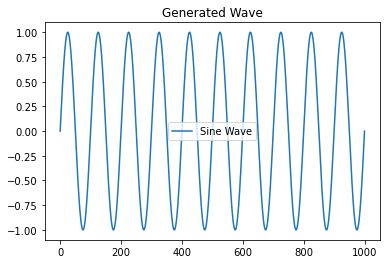

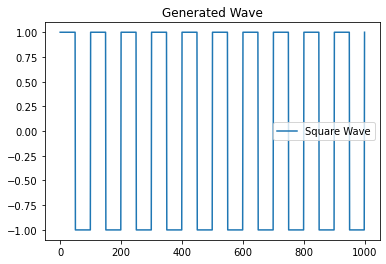

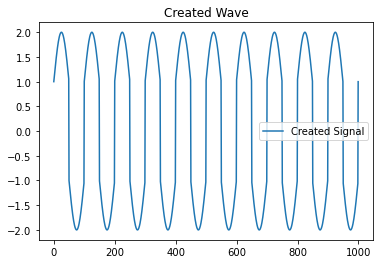

quit


In [16]:
if __name__ == '__main__':

    def check_arguments():
        pass

    def get_params(func_sequence, pattern = r'\((.*?)\)' ):
        # func_sequence: ['func1(a=1,b=4)', 'func2(a=1,b=3)', 'func2(a=1,b=3)']
        import re

        params = []
        for input_str in func_sequence:
            print(input_str)
            match = re.search(pattern, input_str)
            if match:
                parameters_str = match.group(1)
                parameters_list = parameters_str.split(',')
                parameters_list = [param.strip() for param in parameters_list]
                if parameters_list == ['']:
                    parameters_dic = None
                else:
                    parameters_dic = {}
                    for paramters in parameters_list:
                        check_arguments()
                        paramters_splits = paramters.split('=')
                        if paramters_splits[0] == 'signal':
                            continue
                        if paramters_splits[0] == 'show':
                            parameters_dic[paramters_splits[0]] = True if paramters_splits[-1] == 'true' else False
                            continue
                        parameters_dic[paramters_splits[0]] = float(paramters_splits[-1])
                params.append([input_str.split('(')[0], parameters_dic])
            else:
                params.append([input_str.split('(')[0], None])
        return params

    def check_callable(func_name):
        func = globals()[func_name]
        if func is not None and callable(func):
            return True
        else:
            print(f"函数 '{func_name}' 未找到或不可调用。")
            print(f"")
            return False

    def load_scg_data():
        signals_train, labels_train, duration, fs =  load_scg(0.1, 'train')
        return signals_train[0]

    def load_create_data(func_sequence_str):
        func_sequence = func_sequence_str.split('+')
        funcname_params = get_params(func_sequence)
        middle_res = np.zeros(1000)

        # iterate dic
        for func_name, params in funcname_params:
            if not check_callable(func_name):
                break
            func = globals()[func_name]
            middle_res += func(**params)

        plt.figure()
        plt.plot(middle_res, label='Created Signal')
        plt.title('Created Wave')
        plt.legend()
        plt.show()
        return middle_res

    def check_and_load_data(inputs):
        data_sources = ['scg', 'create']
        middle_res = None
        func_seq_start = -1

        if inputs[0] not in data_sources:
            return None, None
        elif inputs[0] == 'scg':
            middle_res = load_scg_data()
            func_seq_start = 1
        elif inputs[0] == 'create':
            middle_res = load_create_data(inputs[1])
            func_seq_start = 2
        return middle_res, func_seq_start

    while True:
        inputs = input("Enter sth").lower().split(' ')

        # quit
        if inputs[0] in ['q', 'quit']:
            print('quit')
            break
        if 'q' in inputs or 'quit' in inputs:
            print('quit')
            break

        # help
        if inputs[0] in ['h', 'help']:
            for i in range(1, len(inputs)):
                func_name = inputs[i]
                print(help(globals()[func_name]))
            continue

        if inputs[0] in ['s', 'save']:
            pass

        middle_res = None
        func_seq_start = 1

        middle_res, func_seq_start = check_and_load_data(inputs)

        funcname_params = get_params(inputs[func_seq_start:])

        for func_name, params in funcname_params:
            if not check_callable(func_name):
                break
            print(f'Function Name: {func_name}')
            func = globals()[func_name]
            params['signal'] = middle_res
            print(f'Input shape of Function: {middle_res.shape}')
            middle_res = func(**params)
            print(f'Output shape of Function: {middle_res.shape}')
            print()
            # print(middle_res)

In [ ]:
# 1. help
# help add_white_noise

# 2. Use default parameters
# scg add_white_noise(signal=scg)

# 3. Use defined parameters
# scg add_white_noise(signal=scg,noise_amplitude=0.4,show=True)

# 4. input is function sequences
# scg add_white_noise(signal=scg,noise_amplitude=0.4,show=True) butter_bandpass_filter(signal=scg,show=True) eemd_decomposition(signal=scg,show=True)

# 5. create wave
# create sine_wave(amplitude=1,frequency=1,show=True)

# 6. create complex wave
# create sine_wave(amplitude=1,frequency=1,show=True)+square_wave(show=True)

# 7. use created waves as input
# create sine_wave(amplitude=1,frequency=1,show=True)+square_wave(show=True) add_white_noise(signal=scg,noise_amplitude=0.2,show=True)

# 8. use created waves as input
# create sine_wave(amplitude=1,frequency=1,show=True)+sine_wave(amplitude=2,frequency=2,show=True) add_white_noise(signal=scg,noise_amplitude=0.2,show=True) eemd_decomposition(signal=scg,show=True)

In [21]:
    def check_arguments():
        pass
    def get_params(func_sequence, pattern = r'\((.*?)\)' ):
        import re

        params = {}
        for input_str in func_sequence.split():
            print(input_str)
            match = re.search(pattern, input_str)
            if match:
                parameters_str = match.group(1)
                parameters_list = parameters_str.split(',')
                parameters_list = [param.strip() for param in parameters_list]
                if parameters_list == ['']:
                    parameters_dic = None
                else:
                    parameters_dic = {}
                    for paramters in parameters_list:
                        check_arguments()
                        paramters_splits = paramters.split('=')
                        parameters_dic[paramters_splits[0]] = paramters_splits[-1]
                params[input_str.split('(')[0]] = parameters_dic
            else:
                params[input_str] = None
        return params
    get_params('func0 func1() func2(a=1) func3(a=-1,b=2)')


func0
func1()
func2(a=1)
func3(a=-1,b=2)


{'func0': None,
 'func1': None,
 'func2': {'a': '1'},
 'func3': {'a': '-1', 'b': '2'}}